In [1]:
## Olympics_Assignment_Solution
## Author: Shreyansh Agarwal
## Date: 16th Jan 18
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score,silhouette_samples
%matplotlib inline

In [2]:
def load_data():
    data=pd.read_csv('data/olympics.csv', skiprows=1)
    data=data.rename(columns=lambda x: re.sub('^01.!..|^01.!','Gold',x))
    data=data.rename(columns=lambda x: re.sub('^02.!..|^02.!','Silver',x))
    data=data.rename(columns=lambda x: re.sub('^03.!..|^03.!','Bronze',x))
    country_name=[]
    country_code=[]
    for i in data.iloc[:,0].values:
        i=i.split('\xa0')
        country_name.append(i[0])
        try:
            code=i[1]
        except:
            continue
        country_code.append(code.split()[0][1:4])
    country_code.append('')
    df=pd.DataFrame(country_code)
    df=df.rename(columns={0:'country_code'})
    del data['Unnamed: 0']
    data=pd.concat([df, data], axis=1)
    data.index=country_name
    data=data.drop(data.index[-1])
    del df
    return data

In [3]:
def first_country(data):
    return data.iloc[0,:]
data=load_data()
first_country(data)

country_code      AFG
# Summer           13
Gold                0
Silver              0
Bronze              2
Total               2
# Winter            0
Gold                0
Silver              0
Bronze              0
Total.1             0
# Games            13
Gold                0
Silver              0
Bronze              2
Combined total      2
Name: Afghanistan, dtype: object

In [4]:
def gold_medal(data):
    return data.iloc[:,2].argmax()

In [5]:
def biggest_difference_in_gold_medal(data):
    return (data.iloc[:,2]-data.iloc[:,7]).abs().argmax()

In [6]:
def get_points(data):
    return data.iloc[:,12]*3+data.iloc[:,13]*2+data.iloc[:,14]

><b> NOTE</b>: For k_means function please see olympics_mini_project-solution.py , in this notebook the solution for optimal k is explained.
    

In [7]:

# Transforming data using get_points function.
points=pd.DataFrame(get_points(data))
points=points.rename(columns={0:'points'})
Data=pd.concat([data['# Games'],points],axis=1)
Data.head()

,# Games,points
Afghanistan,13,2
Algeria,15,27
Argentina,41,130
Armenia,11,16
Australasia,2,22


In [8]:
scaled_data=scale(Data) #scaling the data 

### Elbow method for optimal k 

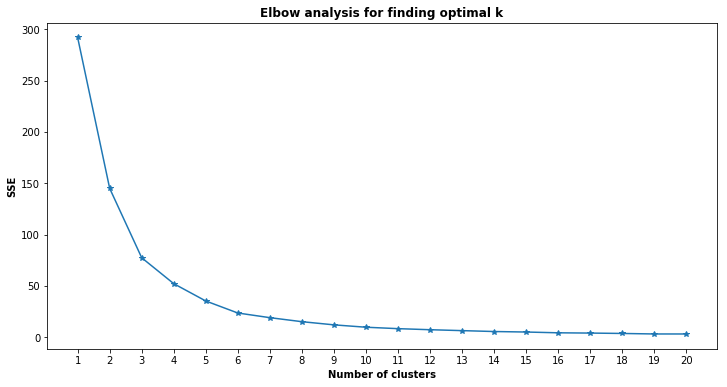

In [9]:
cluster_range = range( 1, 21 )
cluster_SSE = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_data )
    cluster_SSE.append( clusters.inertia_ )
plt.figure(figsize=(12,6))
plt.plot( cluster_range,cluster_SSE, marker = "*" )
plt.xlabel('Number of clusters', fontweight='bold')
plt.ylabel('SSE', fontweight='bold')
plt.title('Elbow analysis for finding optimal k', fontweight='bold')
plt.xticks(cluster_range)
plt.show()

* The elbow method shows that the <b>SSE</b> (Sum of squared error) reduces significantly from 2 to 5, so that gives us a range of optimal k values. 
* Now, we will perform silhouette analysis in the range founded from elbow method. 
* The silhouette of a data instance is a measure of how closely it is matched to data within its cluster and how loosely it is matched to data of the neighbouring cluster (Wikipedia).

### Silhouette Analysis for optimal k

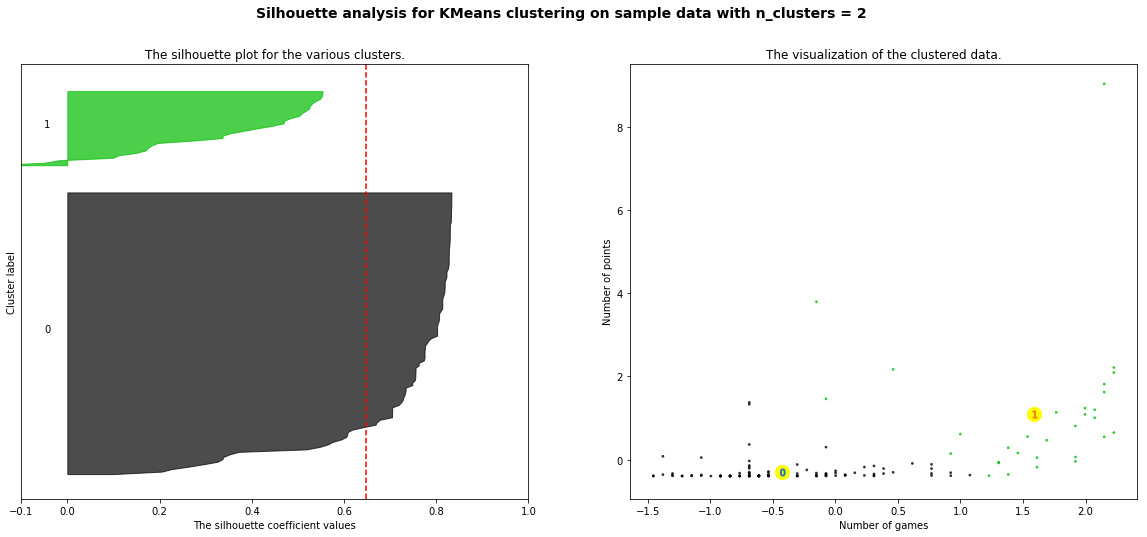

The silhouette score is :  0.647400836728


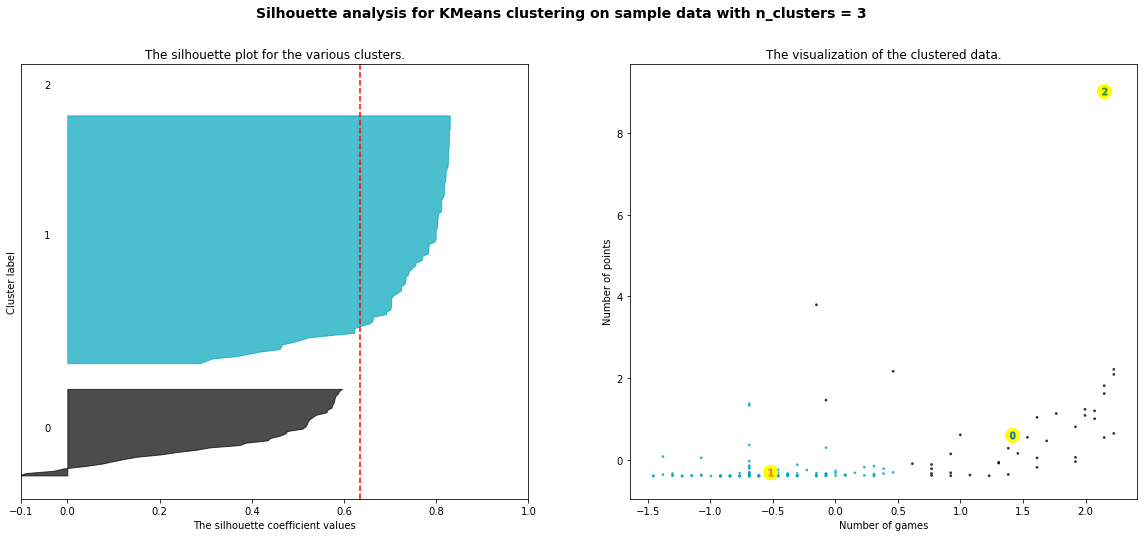

The silhouette score is :  0.635640108007


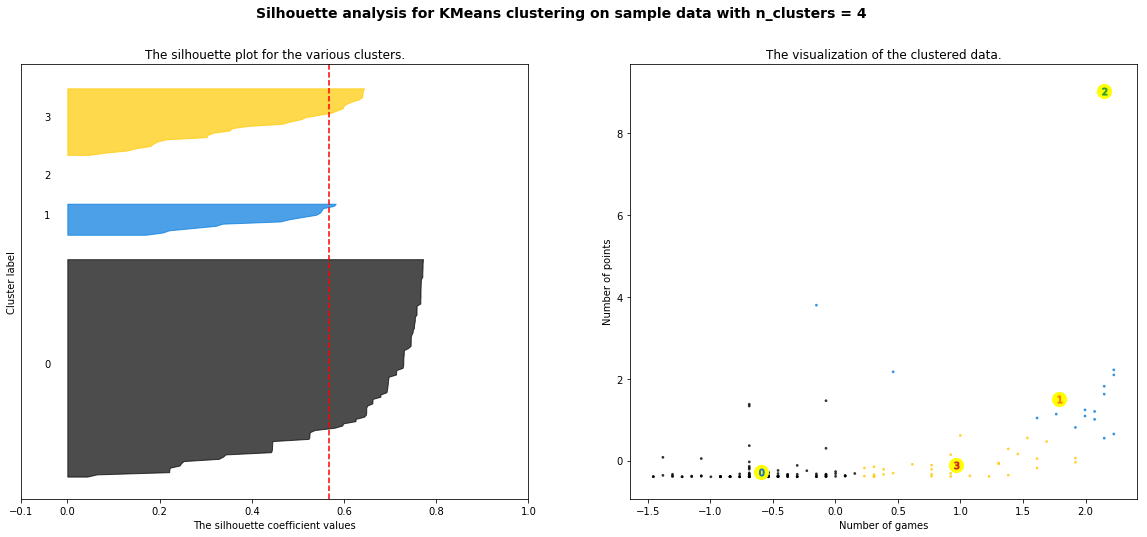

The silhouette score is :  0.56794703898


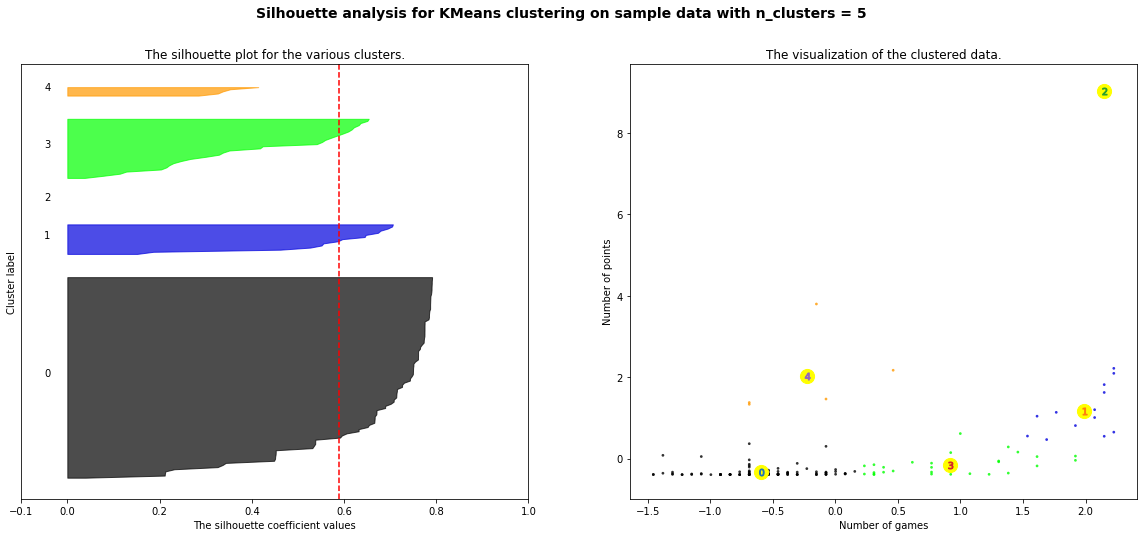

The silhouette score is :  0.589215679862


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=28, tol=0.0001, verbose=0)

In [10]:
result_dict={}
for n_clusters in range(2,6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=28)
    y_kmeans=kmeans.fit_predict(scaled_data)
    sample_silhouette_coeff = silhouette_samples(scaled_data, y_kmeans)
    silhouette_avg=silhouette_score(scaled_data,y_kmeans)
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 8)
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_data) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_coeff = sample_silhouette_coeff[y_kmeans == i]

        ith_cluster_silhouette_coeff.sort()

        size_cluster_i = ith_cluster_silhouette_coeff.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_coeff,facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.spectral(y_kmeans.astype(float) / n_clusters)
    ax2.scatter(scaled_data[:, 0], scaled_data[:, 1], marker='.', s=30, lw=0, alpha=0.8,
              c=colors)

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw yellow coloured circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="yellow", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Number of games")
        ax2.set_ylabel("Number of points")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

    plt.show()
    print ('The silhouette score is : ',silhouette_avg)
    result_dict.update({n_clusters:silhouette_avg})
optimal_k=4 # from elbow and silhouette analysis
kmeans=KMeans(n_clusters=optimal_k,random_state=28)
kmeans.fit(scaled_data)


* As we can see from above plots, the silhouette coeff value for cluster 2 is nearly 0 as that is only 1 point (outlier), we can remove it from the data earlier but it is not needed as k means will separate it itself.
* We will prefer a K for which:
    + The cluster silhouette coefficient values are greater than the silhouette average or the silhouette score.
    + The size of clusters should be close to equal.
    + In the plots 'Visualization of Clustered Data' the observations should not be assigned to wrong clusters.


* Now, from the plots we can see that for K = 2,3 and 5 atleast 1 cluster other than 2 has lower score than average, so k =4 is the optimal cluster.

In [11]:
optimal_k,kmeans.cluster_centers_

(4, array([[-0.59414249, -0.28109683],
        [ 1.79105491,  1.49575116],
        [ 2.14895072,  9.03728239],
        [ 0.96146232, -0.11757948]]))